##### Import the neccessary libraries

In [1]:
import os
import numpy as np
import scipy 
import matplotlib.pyplot as plt 
import pandas as pd
import cv2
from pathlib import Path

In [2]:
labels_dict={"cat":0,"dog":1}
rows=64
cols=64
channels=64
#The dataset has photos of variable sizes, so for our model we will be resizing each image to a 64x64 image having 3(RGB) channels

### Step-1 Data Collection and Preprocessing
The dataset used is the Kaggle Dogs Vs Cats dataset.
The link for the dataset has been mentioned in the readme file. The actual dataset has 25000 images, but I will be using only 6000 images for training and another 100 for testing.

In [3]:
p=Path(r"C:\Users\YASHVARDHAN\Desktop\LogReg\Train_data")
dirs=p.glob("*")
image_data=[]
labels=[]
Y=[]
for folder_dirs in dirs:
    label =str(folder_dirs).split("*.jpg")[-1]
    label2=str(folder_dirs).split("\\")[-1]
    label3=str(label2).split(".")     #label3 will help to label each image.
    Y.append(labels_dict[label3[0]])
    img=cv2.imread(label)
    img=cv2.resize(img,(rows,cols))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img/255.0
    image_data.append(img)

Do the same for test data

In [4]:
p=Path(r"C:\Users\YASHVARDHAN\Desktop\LogReg\Test_data")
dirs=p.glob("*")
image_data_test=[]
labels=[]
Y_test=[]
for folder_dirs in dirs:
    label =str(folder_dirs).split("*.jpg")[-1]
    #print(label)
    label2=str(folder_dirs).split("\\")[-1]
    label3=str(label2).split(".")
    Y_test.append(labels_dict[label3[0]])
    img=cv2.imread(label)
    #print(img)
    img=cv2.resize(img,(rows,cols))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #img[np.all(img == [0, 0, 0, 255], axis=2)] = [0, 0, 0, 0]
    img=img/255.0
    image_data_test.append(img)
    #print(type(img)) 

### Let's check if we have correctly created our dataset.

1000


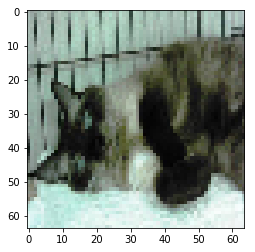

0


In [10]:
print(len(image_data_test))
plt.imshow(image_data_test[0])
plt.show()
print(Y_test[0])

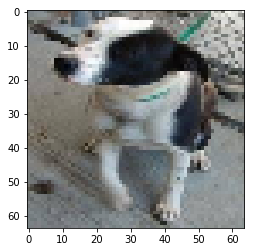

1


In [12]:
plt.imshow(image_data[5432])
plt.show()
print(Y[5432])

In [13]:
#converting all the lists to numpy arrays.
X_train=np.array(image_data)
Y_train=np.array(Y)
X_test=np.array(image_data_test)
Y_test=np.array(Y_test)

#Now flattening the images, as the image needs to be fed to a Logistic Regression Unit.
X_train_flatten=X_train.reshape(X_train.shape[0],-1).T
Y_train=Y_train.reshape(1,Y_train.shape[0])
X_test_flatten=X_test.reshape(X_test.shape[0],-1).T
Y_test=Y_test.reshape(1,Y_test.shape[0])



print(X_train_flatten.shape)
print(Y_train.shape)

print(X_test_flatten.shape)
print(Y_test.shape)


(12288, 6002)
(1, 6002)
(12288, 1000)
(1, 1000)


In [14]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [15]:
print(sigmoid(0))

0.5


In [16]:
def propagate(w,b,X,Y):
    #This function will do both the forward propagation and backward propagation of the Logistic Regression.
    #Think of the logistic unit as the output of a neural network which has the pixels of an image as input and has NO HIDDEN UNITS.
    m=X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b) #calculating the output from each input by multiplying each input neuron by its weight.
    cost=(-1/m)*np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))  #calculating the loss/cost function.
    #The next two lines are the derivatives that are calculated for the sake of backward propagation.
    dw=(1/m)*(np.dot(X,(A-Y).T))
    db=(1/m)*np.sum(A-Y)
    grad={
        "dw":dw,"db":db
    }
    return grad, cost

In [17]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))
print(X)

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205
[[1 2]
 [3 4]]


In [33]:
#This fucntion performs the Gradient Descent algorithm.
def optimize(w,b,X,Y,epochs,learning_rate):
    costs=[]
    for i in range(0,epochs):
        grads,cost=propagate(w,b,X,Y)
        dw=grads["dw"]
        db=grads["db"]
        w=w-(learning_rate*dw)
        b=b-(learning_rate*db)
        costs.append(cost)
        if(i%100==0):
            print("Cost after "+str(i)+" epoch is "+str(cost))
    params={
        "w":w,
        "b":b
    }
    grads={
        "dw":dw,
        "db":db
    }
    return params,grads,costs
    
    

In [34]:
#This function will predict the ouput the new weights, that will be returned by the optimize fucntion.
def predict(w,b,X):
    m=X.shape[1]
    y_predictions=np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        y_predictions[0,i]= 1 if A[0, i] > 0.5 else 0
        
    return y_predictions 

In [30]:
#This fucntion binds all the previous written functions, it basially acts as a complete model.
def logisticRegressionAsNN(X_train_flatten,Y_train,X_test_flatten,Y_test,epochs=2000,learning_rate=0.003):
    w=np.zeros((X_train_flatten.shape[0],1))
    b=0
    parameters,grads,costs=optimize(w,b,X_train_flatten,Y_train,epochs,learning_rate)
    w=parameters["w"]
    b=parameters["b"]
    Y_prediction_test = predict(w, b, X_test_flatten)
    Y_prediction_train = predict(w, b, X_train_flatten)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "epochs": epochs}
    
    return d
    

In [31]:
d = logisticRegressionAsNN(X_train_flatten,Y_train,X_test_flatten,Y_test,epochs = 2000, learning_rate = 0.003)

Cost after 0 epoch is 0.6931471805599453
Cost after 100 epoch is 0.6717321336267407
Cost after 200 epoch is 0.6639668242461868
Cost after 300 epoch is 0.6588170598533337
Cost after 400 epoch is 0.6548500931916706
Cost after 500 epoch is 0.6515436772200386
Cost after 600 epoch is 0.6486492713760402
Cost after 700 epoch is 0.6460330266715051
Cost after 800 epoch is 0.643617089688808
Cost after 900 epoch is 0.6413535396924455
Cost after 1000 epoch is 0.6392114456328002
Cost after 1100 epoch is 0.6371699534390045
Cost after 1200 epoch is 0.6352144042854906
Cost after 1300 epoch is 0.6333340722790218
Cost after 1400 epoch is 0.631520805960564
Cost after 1500 epoch is 0.6297681911670203
Cost after 1600 epoch is 0.6280710227267734
Cost after 1700 epoch is 0.6264249632735863
Cost after 1800 epoch is 0.6248263177456279
Cost after 1900 epoch is 0.6232718807706563
train accuracy: 66.06131289570143 %
test accuracy: 59.9 %


###### The model wasn't able to give us good results on the dataset, but considering the simpleness of the model it sailed almost fairly. Maybe tuning some of the hyperparameters may give us better results.

In [35]:
costs=d["costs"]

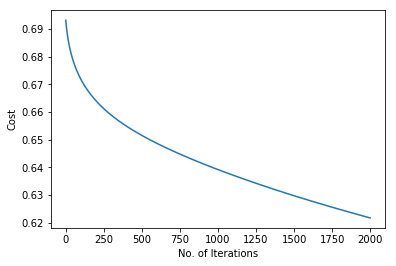

In [40]:
plt.plot(costs)
plt.ylabel("Cost")
plt.xlabel("No. of Iterations")
plt.show()


The gradient descent algorithm was only able to bring down the cost by 0.07 units as can be been from the graph. 